In [1]:
from google.colab import files
uploaded = files.upload()


Saving apple_final2.csv to apple_final2.csv


In [102]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')


In [103]:
df = pd.read_csv('apple_final2.csv')
df

,Unnamed: 0,Date,sentiment_value,yesterday_sentiment,Open,High,Low,Close,Volume,avgprice,yvalue
0,0,1/2/2015,4.943019,0.000000,27.847500,27.860001,26.837500,27.332500,212818400,27.348751,27.348751
1,1,1/5/2015,1.014909,4.943019,27.072500,27.162500,26.352501,26.562500,257142000,26.757500,-0.591250
2,2,1/6/2015,2.509605,1.014909,26.635000,26.857500,26.157499,26.565001,263188400,26.507500,-0.250001
3,3,1/7/2015,3.265148,2.509605,26.799999,27.049999,26.674999,26.937500,160423600,26.862499,0.355000
4,4,1/8/2015,8.972554,3.265148,27.307501,28.037500,27.174999,27.972500,237458000,27.606250,0.743750
...,...,...,...,...,...,...,...,...,...,...,...
807,807,3/22/2018,6.657773,5.250375,42.500000,43.169998,42.150002,42.212502,165963200,42.660000,-0.633749
808,808,3/23/2018,3.560382,6.657773,42.097500,42.480000,41.235001,41.235001,164115200,41.857501,-0.802500
809,809,3/26/2018,9.615179,3.560382,42.017502,43.275002,41.610001,43.192501,150164800,42.442501,0.585001
810,810,3/27/2018,4.131726,9.615179,43.419998,43.787498,41.730000,42.084999,163690400,42.758749,0.316248


In [104]:

df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
X = df[['sentiment_value', 'yesterday_sentiment', 'Open', 'High', 'Low', 'Close', 'Volume']]
X.head()

,sentiment_value,yesterday_sentiment,Open,High,Low,Close,Volume
0,4.943019,0.000000,27.847500,27.860001,26.837500,27.332500,212818400
1,1.014909,4.943019,27.072500,27.162500,26.352501,26.562500,257142000
2,2.509605,1.014909,26.635000,26.857500,26.157499,26.565001,263188400
3,3.265148,2.509605,26.799999,27.049999,26.674999,26.937500,160423600
4,8.972554,3.265148,27.307501,28.037500,27.174999,27.972500,237458000


In [105]:
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,

In [106]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

svClassifier = SVC().fit(x_train, y_train)

In [107]:
y_pred = svClassifier.predict(x_test)


In [108]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.4723926380368098


**Quanitifying a Strategy Profile**

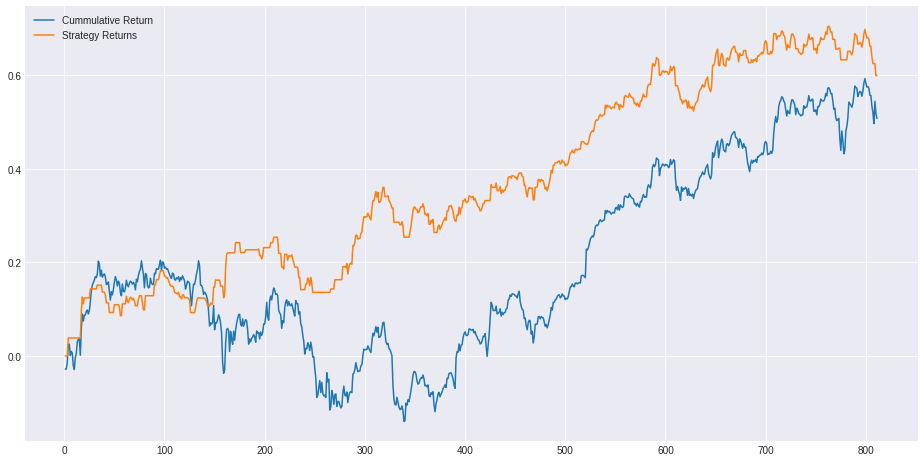

In [109]:
df['Predicted_Signal'] = svClassifier.predict(X)
df['Return'] = df.Close.pct_change()
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)
df['Cum_Ret'] = df['Return'].cumsum()
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
plt.figure(figsize=(16,8))
plt.plot(df['Cum_Ret'])
plt.plot(df['Cum_Strategy'])
plt.legend(["Cummulative Return", "Strategy Returns"])
plt.show()

**LSTM**

In [58]:
import math
from sklearn.preprocessing import MinMaxScaler 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [82]:
close_prices = df['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [83]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [84]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_35 (Dense)            (None, 25)                2525      
                                                                 
 dense_36 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=10)

Epoch 1/10
590/590 [==============================] - 24s 36ms/step - loss: 0.0025
Epoch 2/10
590/590 [==============================] - 22s 37ms/step - loss: 0.0014
Epoch 3/10
590/590 [==============================] - 21s 36ms/step - loss: 9.5440e-04
Epoch 4/10
590/590 [==============================] - 21s 36ms/step - loss: 8.0447e-04
Epoch 5/10
590/590 [==============================] - 22s 38ms/step - loss: 7.7382e-04
Epoch 6/10
590/590 [==============================] - 21s 36ms/step - loss: 6.9311e-04
Epoch 7/10
590/590 [==============================] - 21s 35ms/step - loss: 6.5303e-04
Epoch 8/10
590/590 [==============================] - 21s 35ms/step - loss: 6.8464e-04
Epoch 9/10
590/590 [==============================] - 21s 35ms/step - loss: 6.9567e-04
Epoch 10/10
590/590 [==============================] - 21s 35ms/step - loss: 6.1963e-04


In [86]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

6/6 [==============================] - 1s 29ms/step


0.3650404639802157

<ipython-input-87-d4202c9d2279>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


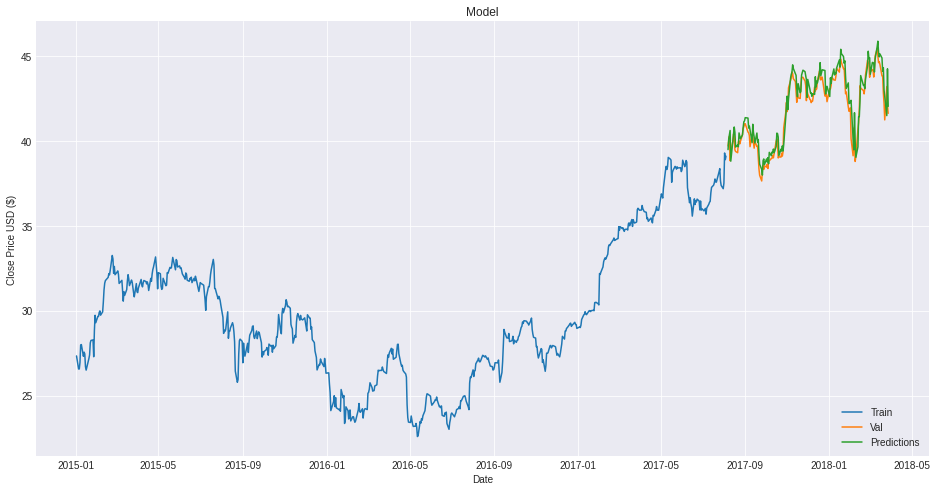

In [87]:
data = df.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

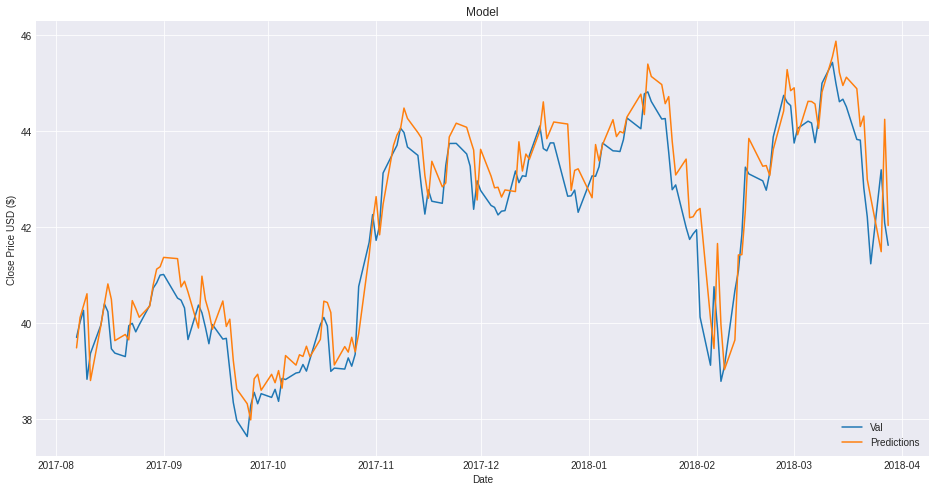

In [88]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

In [100]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# model = Sequential()
# model.add(Dense(x_train.shape[1], activation = 'relu'))
# model.add(Dense(128,activation='relu'))
# model.add(Dense(32,activation='sigmoid'))
# # model.add(Dense(16,activation='relu'))
# # model.add(Dense(16,activation='sigmoid'))
# # model.add(Dense(8,activation='relu'))
# model.add(Dense(1))

model = keras.Sequential()
model.add(layers.Dense(x_train.shape[1]))
model.add(layers.Dense(32))
model.add(layers.Dense(8))
model.add(layers.Dense(1))


model.compile(optimizer='adam',loss='mean_squared_error')
history = model.fit(x_train,y_train,batch_size=1,epochs=5)

Epoch 1/5
590/590 [==============================] - 2s 2ms/step - loss: 0.0135
Epoch 2/5
590/590 [==============================] - 1s 2ms/step - loss: 0.0115
Epoch 3/5
590/590 [==============================] - 1s 2ms/step - loss: 0.0116
Epoch 4/5
590/590 [==============================] - 1s 2ms/step - loss: 0.0113
Epoch 5/5
590/590 [==============================] - 1s 2ms/step - loss: 0.0112


In [101]:
pred = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(pred - y_test)**2)
rmse

6/6 [==============================] - 0s 3ms/step


41.093680903485776

<ipython-input-97-d4202c9d2279>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


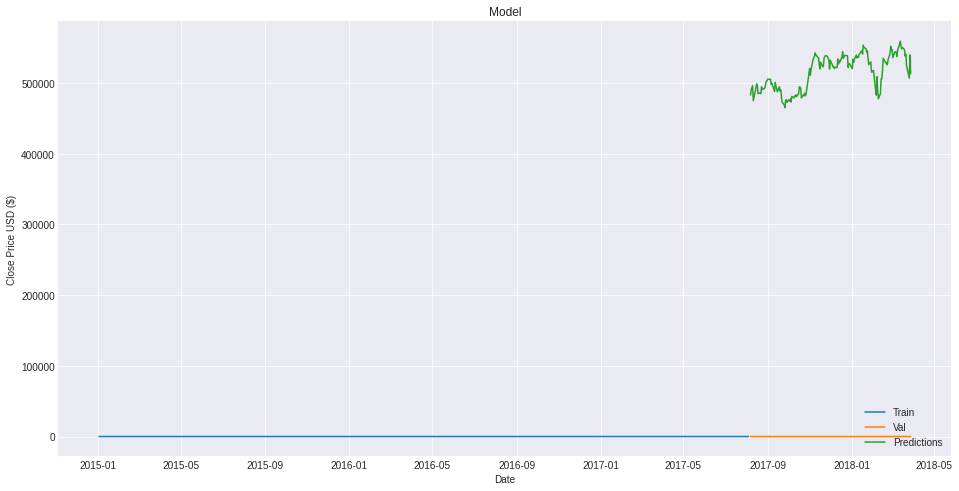

In [97]:
data = df.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()